# <u>Name :</u> ADVAIT GURUNATH CHAVAN
# <u>Email ID:</u> advaitchavan135@gmail.com
# CDAC PGDAI DATA ANALYTICS ASSIGNMENT__10

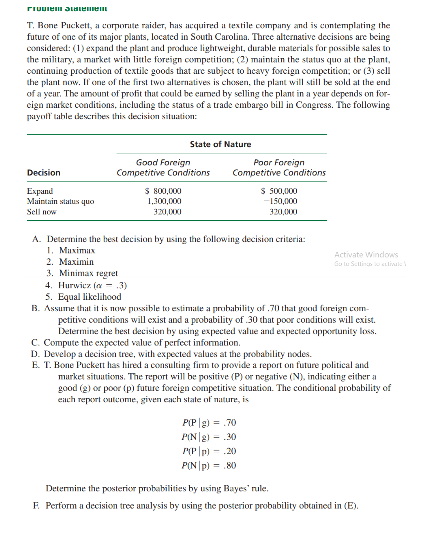

In [1]:
import numpy as np

In [2]:
payoffs = {
    "Expand": {"Good": 800000, "Poor": 500000},
    "Maintain": {"Good": 1300000, "Poor": -150000},
    "Sell": {"Good": 320000, "Poor": 320000}
}

states = ["Good", "Poor"]

# Task A: Decision Criteria Without Probabilities

## A1. Maximax Criterion (optimistic view)

In [3]:
maximax = {decision: max(values.values()) for decision, values in payoffs.items()}
best_maximax = max(maximax, key=maximax.get)

## A2. Maximin Criterion (pessimistic view)

In [4]:
maximin = {decision: min(values.values()) for decision, values in payoffs.items()}
best_maximin = max(maximin, key=maximin.get)

## A3. Minimax Regret Criterion

In [5]:
best_state_payoff = {state: max(payoffs[decision][state] for decision in payoffs) for state in states}

In [6]:
regrets = {}
for decision, outcomes in payoffs.items():
    regrets[decision] = {state: best_state_payoff[state] - payoff for state, payoff in outcomes.items()}

In [7]:
max_regrets = {decision: max(regret_vals.values()) for decision, regret_vals in regrets.items()}
best_minimax_regret = min(max_regrets, key=max_regrets.get)

## A4. Hurwicz Criterion (α = 0.3; weighted average between best and worst outcomes)

In [8]:
alpha = 0.3
hurwicz = {
    decision: alpha * max(values.values()) + (1 - alpha) * min(values.values())
    for decision, values in payoffs.items()
}
best_hurwicz = max(hurwicz, key=hurwicz.get)

## A5. Equal Likelihood (Laplace) Criterion

In [9]:
equal_likelihood = {
    decision: np.mean(list(values.values()))
    for decision, values in payoffs.items()
}
best_equal_likelihood = max(equal_likelihood, key=equal_likelihood.get)

In [10]:
print("Task A: Decision Criteria")
print("----------------------------")
print("Maximax values:", maximax, "-> Best decision:", best_maximax)
print("Maximin values:", maximin, "-> Best decision:", best_maximin)
print("Regret table (by state):", regrets)
print("Maximum Regrets:", max_regrets, "-> Best decision by minimax regret:", best_minimax_regret)
print("Hurwicz (α = 0.3) values:", hurwicz, "-> Best decision:", best_hurwicz)
print("Equal Likelihood values:", equal_likelihood, "-> Best decision:", best_equal_likelihood)
print("\n")

Task A: Decision Criteria
----------------------------
Maximax values: {'Expand': 800000, 'Maintain': 1300000, 'Sell': 320000} -> Best decision: Maintain
Maximin values: {'Expand': 500000, 'Maintain': -150000, 'Sell': 320000} -> Best decision: Expand
Regret table (by state): {'Expand': {'Good': 500000, 'Poor': 0}, 'Maintain': {'Good': 0, 'Poor': 650000}, 'Sell': {'Good': 980000, 'Poor': 180000}}
Maximum Regrets: {'Expand': 500000, 'Maintain': 650000, 'Sell': 980000} -> Best decision by minimax regret: Expand
Hurwicz (α = 0.3) values: {'Expand': 590000.0, 'Maintain': 285000.0, 'Sell': 320000.0} -> Best decision: Expand
Equal Likelihood values: {'Expand': 650000.0, 'Maintain': 575000.0, 'Sell': 320000.0} -> Best decision: Expand




# Task B: Expected Value & Expected Opportunity Loss (EOL) with Given Probabilities

In [11]:
p_good = 0.70
p_poor = 0.30

## B1. Expected Value (EV) for each decision:

In [12]:
expected_values = {
    decision: p_good * outcomes["Good"] + p_poor * outcomes["Poor"]
    for decision, outcomes in payoffs.items()
}
best_ev_decision = max(expected_values, key=expected_values.get)

## B2. Expected Opportunity Loss (EOL) for each decision:

In [13]:
eol = {
    decision: p_good * regrets[decision]["Good"] + p_poor * regrets[decision]["Poor"]
    for decision in payoffs
}
best_eol_decision = min(eol, key=eol.get)

In [14]:
print("Task B: Expected Value and Expected Opportunity Loss (EOL)")
print("-----------------------------------------------------------")
print("Expected Values:", expected_values, "-> Best decision by EV:", best_ev_decision)
print("Expected Opportunity Loss (EOL):", eol, "-> Best decision by minimum EOL:", best_eol_decision)
print("\n")

Task B: Expected Value and Expected Opportunity Loss (EOL)
-----------------------------------------------------------
Expected Values: {'Expand': 710000.0, 'Maintain': 865000.0, 'Sell': 320000.0} -> Best decision by EV: Maintain
Expected Opportunity Loss (EOL): {'Expand': 350000.0, 'Maintain': 195000.0, 'Sell': 740000.0} -> Best decision by minimum EOL: Maintain




# Task C: Expected Value of Perfect Information (EVPI)

In [15]:
ev_perfect_info = p_good * best_state_payoff["Good"] + p_poor * best_state_payoff["Poor"]

In [16]:
evpi = ev_perfect_info - expected_values[best_ev_decision]

In [17]:
print("Task C: Expected Value of Perfect Information (EVPI)")
print("------------------------------------------------------")
print("EV with Perfect Information:", ev_perfect_info)
print("Best EV (without perfect information):", expected_values[best_ev_decision])
print("EVPI:", evpi)
print("\n")

Task C: Expected Value of Perfect Information (EVPI)
------------------------------------------------------
EV with Perfect Information: 1060000.0
Best EV (without perfect information): 865000.0
EVPI: 195000.0




# Task D: Decision Tree (Textual Representation)

In [18]:
print("Task D: Decision Tree with Expected Values at Chance (Probability) Nodes")
print("--------------------------------------------------------------------------")
for decision in payoffs:
    ev = expected_values[decision]
    print(f"{decision}: Expected Value = ${ev:,.2f}")
print("\n")

Task D: Decision Tree with Expected Values at Chance (Probability) Nodes
--------------------------------------------------------------------------
Expand: Expected Value = $710,000.00
Maintain: Expected Value = $865,000.00
Sell: Expected Value = $320,000.00




# Task E: Posterior Probabilities Using Bayes’ Rule (Consultant Report)

## Given conditional probabilities:
##   P(Positive Report | Good) = 0.70,   P(Negative Report | Good) = 0.30
##   P(Positive Report | Poor) = 0.20,   P(Negative Report | Poor) = 0.80

In [19]:
p_positive_given_good = 0.70
p_positive_given_poor = 0.20

In [20]:
p_good_given_positive = (p_positive_given_good * p_good) / (
    p_positive_given_good * p_good + p_positive_given_poor * p_poor
)
p_poor_given_positive = 1 - p_good_given_positive

## For a negative report:

In [21]:
p_negative_given_good = 0.30
p_negative_given_poor = 0.80

p_good_given_negative = (p_negative_given_good * p_good) / (
    p_negative_given_good * p_good + p_negative_given_poor * p_poor
)
p_poor_given_negative = 1 - p_good_given_negative

In [22]:
print("Task E: Posterior Probabilities (Using Bayes’ Rule)")
print("-----------------------------------------------------")
print("Given a Positive Report:")
print(f"  P(Good | Positive)  = {p_good_given_positive:.4f}")
print(f"  P(Poor | Positive)  = {p_poor_given_positive:.4f}")
print("Given a Negative Report:")
print(f"  P(Good | Negative)  = {p_good_given_negative:.4f}")
print(f"  P(Poor | Negative)  = {p_poor_given_negative:.4f}")
print("\n")

Task E: Posterior Probabilities (Using Bayes’ Rule)
-----------------------------------------------------
Given a Positive Report:
  P(Good | Positive)  = 0.8909
  P(Poor | Positive)  = 0.1091
Given a Negative Report:
  P(Good | Negative)  = 0.4667
  P(Poor | Negative)  = 0.5333




# Task F: Decision Tree Analysis with Posterior Probabilities

In [23]:
def calc_ev(decision, p_good_state):
    p_poor_state = 1 - p_good_state
    return p_good_state * payoffs[decision]["Good"] + p_poor_state * payoffs[decision]["Poor"]

In [24]:
ev_positive = {decision: calc_ev(decision, p_good_given_positive) for decision in payoffs}
best_positive_decision = max(ev_positive, key=ev_positive.get)

In [25]:
ev_negative = {decision: calc_ev(decision, p_good_given_negative) for decision in payoffs}
best_negative_decision = max(ev_negative, key=ev_negative.get)

In [26]:
print("Task F: Decision Tree Analysis using Posterior Probabilities")
print("-------------------------------------------------------------")
print("If the consultant report is POSITIVE:")
for decision, ev in ev_positive.items():
    print(f"  {decision}: EV = ${ev:,.2f}")
print("  Best Decision:", best_positive_decision)
print("\nIf the consultant report is NEGATIVE:")
for decision, ev in ev_negative.items():
    print(f"  {decision}: EV = ${ev:,.2f}")
print("  Best Decision:", best_negative_decision)

Task F: Decision Tree Analysis using Posterior Probabilities
-------------------------------------------------------------
If the consultant report is POSITIVE:
  Expand: EV = $767,272.73
  Maintain: EV = $1,141,818.18
  Sell: EV = $320,000.00
  Best Decision: Maintain

If the consultant report is NEGATIVE:
  Expand: EV = $640,000.00
  Maintain: EV = $526,666.67
  Sell: EV = $320,000.00
  Best Decision: Expand
